# Proyecto Analisis Logistica de productos de un Ecommerce




**¿Qué problema se quiere resolver?**

Una empresa internacional de comercio electrónico quiere descubrir información clave de su base de datos de clientes, para ellos necesita utilizar algunas técnicas de análisis de datos para comprender mejor a sus clientes y mejorar los tiempos de envios. Algunas de las preguntas a responder con este análisis son:

- ¿Cuál fue la clasificación de los clientes?
- ¿El producto fue entregado a tiempo?
- ¿Se responden las consultas de los clientes a tiempo?
- Si la importancia del producto es elevada.¿Por este motivo se entrega con mayor frecuencia a tiempo o no varia si el producto es de mayor relevancia?

**Integrantes:**
*   Jose Carlos Delgado
*   Mariano Silvetti
*   Julián Rivero



**Este conjunto de datos fue elegido porque resulta práctico y eficaz a los fines de los contenidos del curso. Posee 10999 datos y 12 variables, las cuales son:**

1. ID: Número de ID de los Clientes.

2. Bloque de almacén: la empresa tiene un gran almacén que se divide en bloques como A, B, C, D, E.
3. Modo de envío: la empresa envía los productos de varias maneras, como barco, vuelo y carretera.
4. Llamadas de atención al cliente: Número de llamadas realizadas a partir de consulta por consulta del envío.

5. Calificación del cliente: La empresa ha calificado a cada cliente. 1 es el más bajo (peor), 5 es el más alto (mejor).

6. Costo del producto: Costo del Producto en dólares estadounidenses.

7. Compras anteriores: El Número de Compras Previas.

8. Importancia del producto: la empresa ha categorizado el producto en varios parámetros, como bajo, medio, alto.

9. Género: Masculino y Femenino.

10. Descuento ofrecido: Descuento ofrecido en ese producto específico.

11. Peso en gms: Es el peso en gramos.

12. Llegó a tiempo: Es la variable objetivo, donde 1 Indica que el producto NO ha llegado a tiempo y 0 indica que ha llegado a tiempo.


In [ ]:
#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files


In [ ]:
#Creamos el dafaframe importando el csv
files.upload()
df = pd.read_csv('envios_productos.csv', sep = ';')

Saving envios_productos.csv to envios_productos (2).csv


In [ ]:
#vemos los primeros datos del dataset
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
#aplicamos estadistica descriptiva
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,10999.0,5500.000000,3175.282140,1.0,2750.5,5500.0,8249.5,10999.0
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [ ]:
#verificacion de valores nulos
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

No se encontraron valores nulos

In [ ]:
#Veamos una breve informacion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Observaciones: Hay 10999 entradas y 12 Columnas/atributos sin datos nulos. Hay objetos como datos de tipo atributos de categorías y valores numéricos de tipo atributos como entero 64. La identificación (ID) no es importante y se puede descartar.

In [ ]:
#Procederemos a sacar la variable ID pues no es relevante a nuestro analisis
df.drop('ID', axis = 1, inplace = True)

In [ ]:
#con Shape veo cuantos datos y variables tengo
df.shape

(10999, 11)

In [ ]:
#obtencion de la totalidad de registros por columnas
df.count()

Warehouse_block        10999
Mode_of_Shipment       10999
Customer_care_calls    10999
Customer_rating        10999
Cost_of_the_Product    10999
Prior_purchases        10999
Product_importance     10999
Gender                 10999
Discount_offered       10999
Weight_in_gms          10999
Reached.on.Time_Y.N    10999
dtype: int64

In [ ]:
#Analisis del tipo de dato por columna
df.dtypes

Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

Se observa que la mayoria de variables son de tipo numerica, solo 4 son categoricas.

In [ ]:
#Obtener el tipo de estructura del dataset. Ej: si es o no un DataFrame
type(df)

pandas.core.frame.DataFrame

Efectivamente es un tipo DataFrame

In [ ]:
#Listamos los nombres de las columnas
print(df.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


gráfico de barras con la función value_counts() sobre la variable: 'Warehouse_block' o bloque de almacen
    

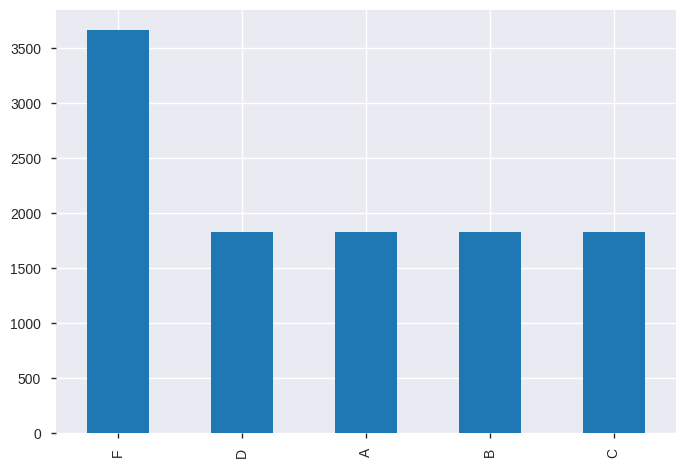

In [ ]:
df['Warehouse_block'].value_counts().plot.bar()
plt.show()

Se observa que el almacen que mayor cantidad tiene es el F

gráfico de líneas de la variable: 'Cost_of_the_Product', utilizando la función value_counts() y realizar un ordenamimiento poor intermedio de: sort_index()

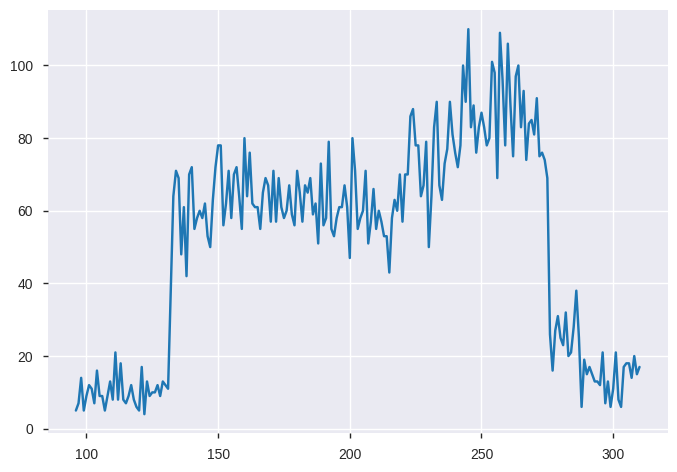

In [ ]:
df['Cost_of_the_Product'].value_counts().sort_index().plot.line()
plt.show()

Crear un hisotgrama de la variable: 'Weight_in_gms' (peso en gramos)

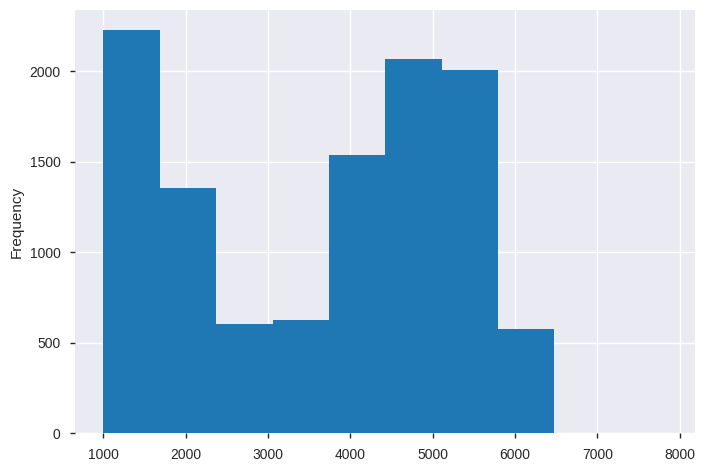

In [ ]:
df['Weight_in_gms'].plot.hist()
plt.show()

Se observa que una distribucion exponecial hacia abajo hasta los 3800 gramos y luego se observa 
una distribucion normal hasta los casi 8000 gramos

In [ ]:
#Data Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df)

TypeError: ignored

Ahora bien, a través del uso del Análisis Bivariado, trataremos de responder una serie de preguntas de negocio.

1) ¿el costo de prodcutos afecta las calificaciones que brindan los clientes?
Podemos usar el diagrama de dispersion para responder a esta pregunta

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


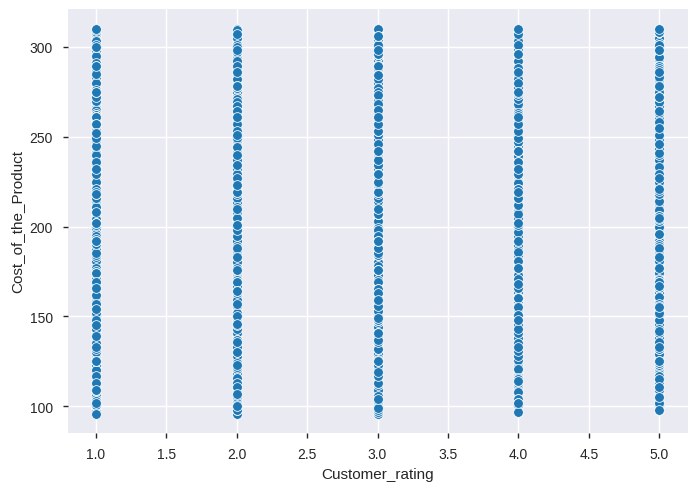

In [ ]:
sns.scatterplot(df['Customer_rating'],df['Cost_of_the_Product'])
plt.show()

Como se ve en el gráfico de dispersion, no se puede determinar una relacion entre estas dos variables. Se ve que,
hay productos muy costosos con baja calificaicon como tambien productos baratos con buena reputacion.

2. ¿Que Bloque de almacen (werehouse block) es el que contiene productos costosos?

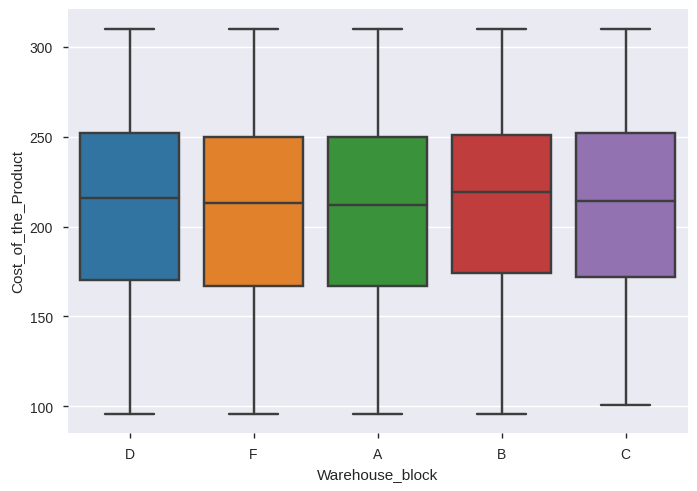

In [ ]:
sns.boxplot(x=df['Warehouse_block'], y=df['Cost_of_the_Product'])
plt.show()

Como se aprecia en el grafico, no hay una diferencia enter los diferentes almacenes(A,B,C,D,F) y los productos 
en que se guardan en ellos. EL almacen D tiene productos ligeramente mas costosos que el resto, pero no es de
mucha relevancia esta diferencia.

3. ¿Existe alguna relacion entre el genero y el costo del producto?
Se usara un diagrama de caja para responder a esta pregunta.

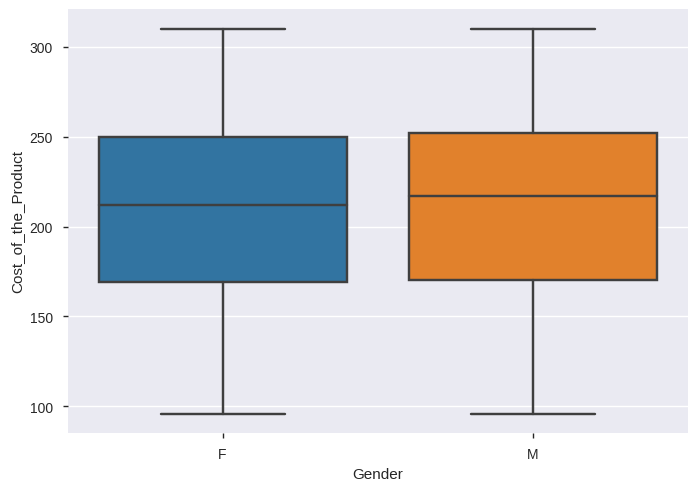

In [ ]:
sns.boxplot(x=df['Gender'], y=df['Cost_of_the_Product'])
plt.show()

El costo del producto es muy similar tanto para hombres como para mujeres.

<Figure size 960x660 with 0 Axes>

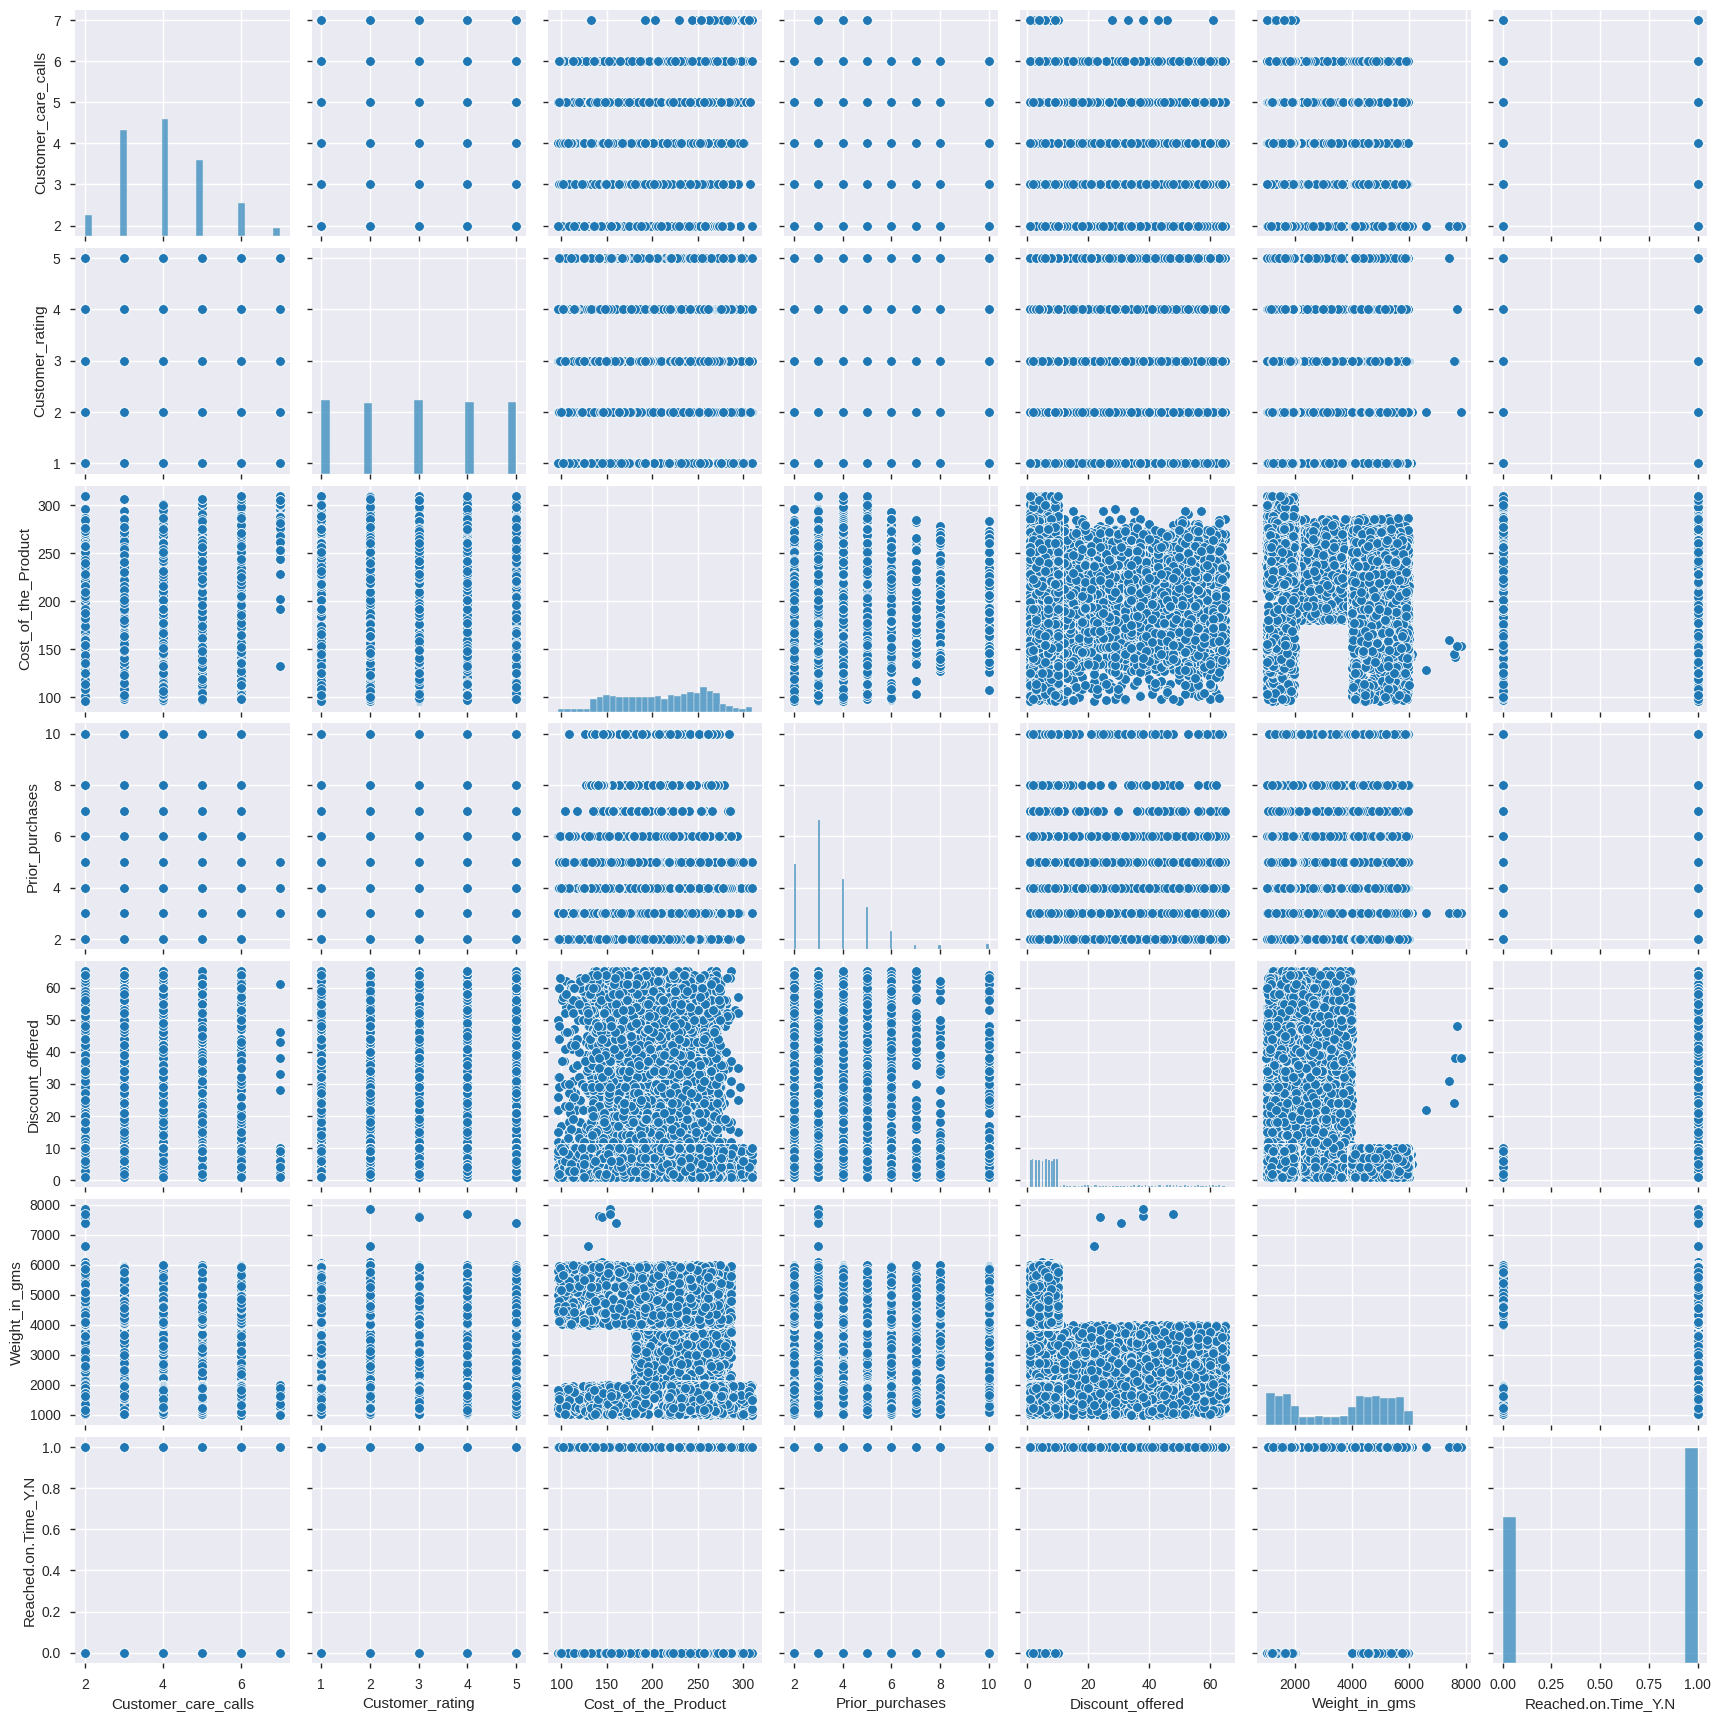

In [ ]:
#A continuacion se muestra el grafico de pares para ver algunas relaciones
plt.figure(dpi = 120)
sns.pairplot(df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

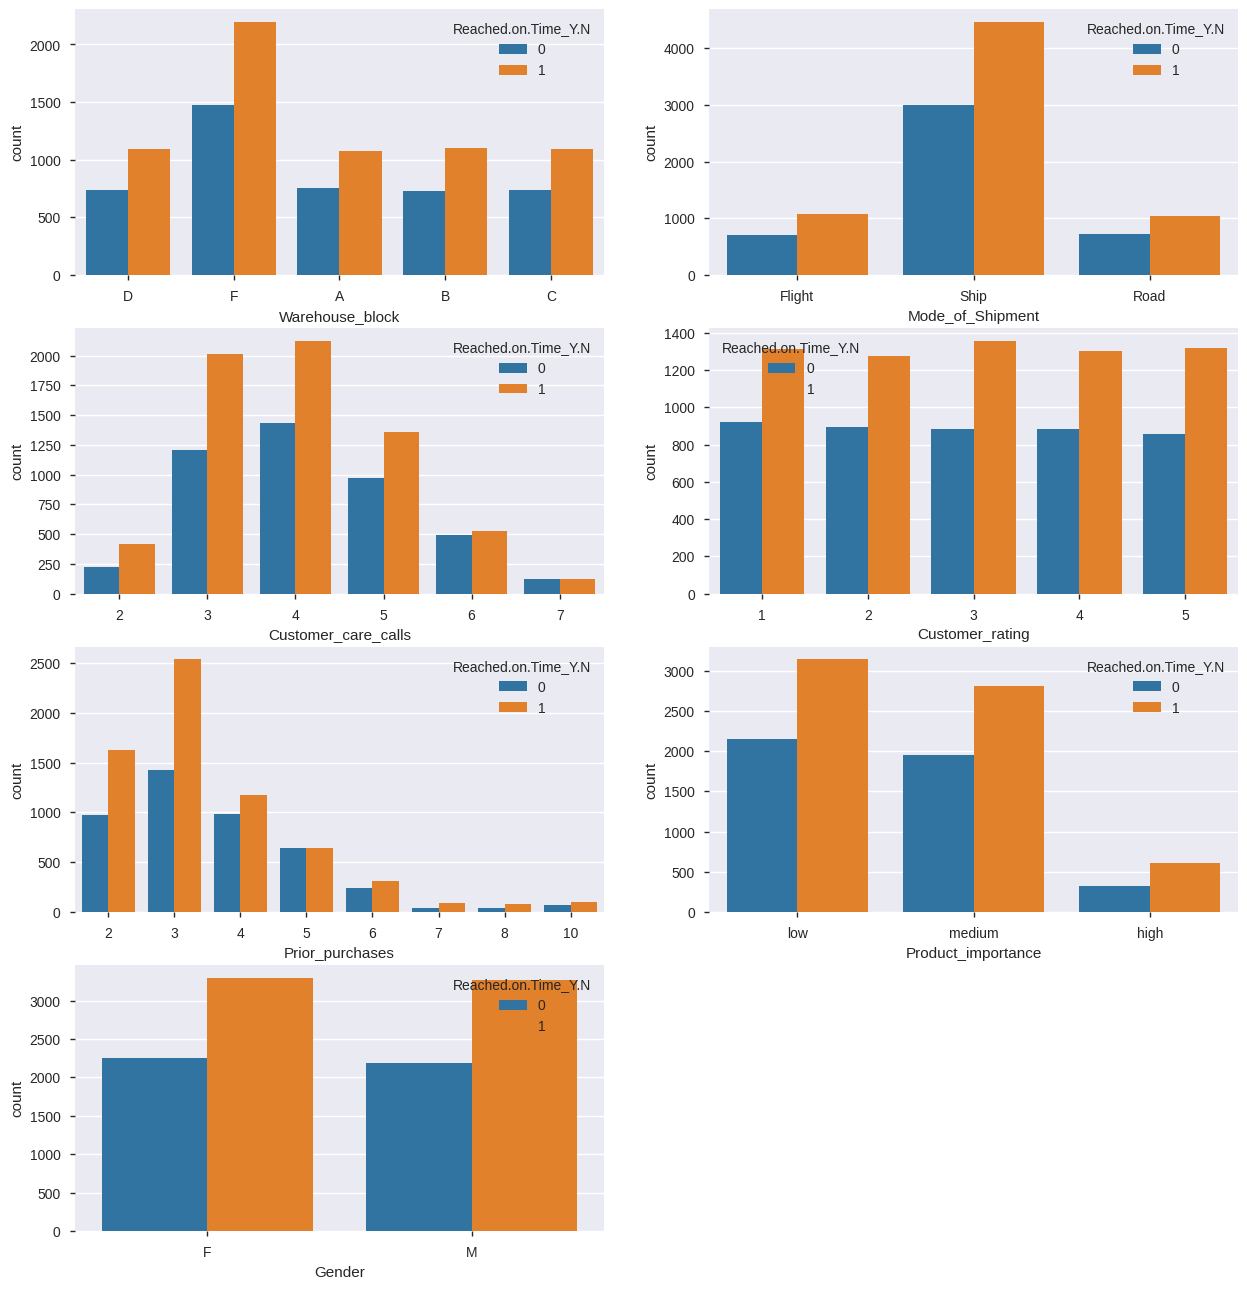

In [ ]:
# Exploramos la relacion entre Reached on time y otros atributos
columns = ["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", 
"Customer_rating", "Prior_purchases", "Product_importance", "Gender"]
plt.figure(figsize = (15, 20))
plotnumber = 1
for i in range(len(columns)):
    if plotnumber <= 9:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot( columns[i], hue ='Reached.on.Time_Y.N',  data = df, ax=ax)
    plotnumber += 1
plt.show()

1. Los Productos entregados a tiempo mayormente son con barco más que Carretera o vuelo 
2. Productos entregados a tiempo con la importancia del producto de (baja y media) son más que importancia alta.

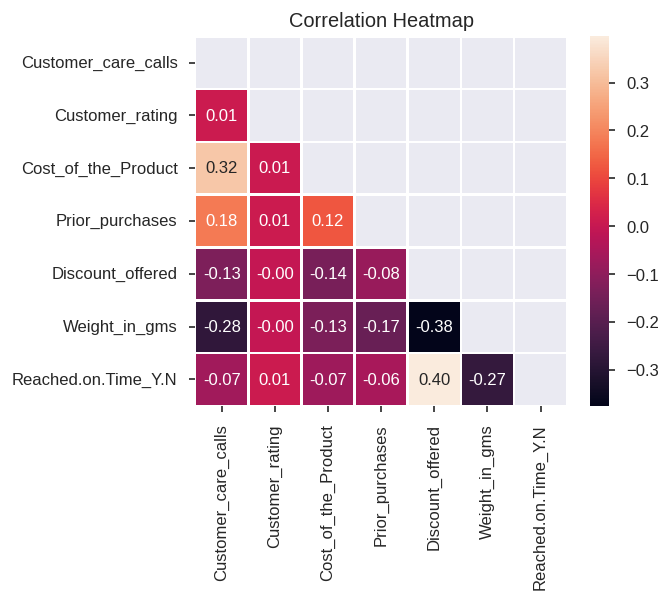

In [ ]:
#Correlaciones
plt.figure(dpi = 120, figsize = (5,4))
mask = np.triu(np.ones_like(df.corr(), dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

## Árbol de Clasificación

In [ ]:
df_dummy = pd.get_dummies(df)
df_dummy

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
df_dummy = df_dummy.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time_Y_N'})

In [ ]:

X = df_dummy.drop(['Customer_care_calls','Customer_rating','Discount_offered','Reached_on_Time_Y_N'], axis=1)
y = df_dummy.Reached_on_Time_Y_N #Defino el Target

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

#Me quedo con 30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(max_depth=2, random_state = 42) #Creamos el modelo

In [ ]:
#Entrenamos el modelo
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
y_train_pred = tree.predict(X_train) #Prediccion en Train
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.6699571372905572
% de aciertos sobre el set de evaluación: 0.6803030303030303


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


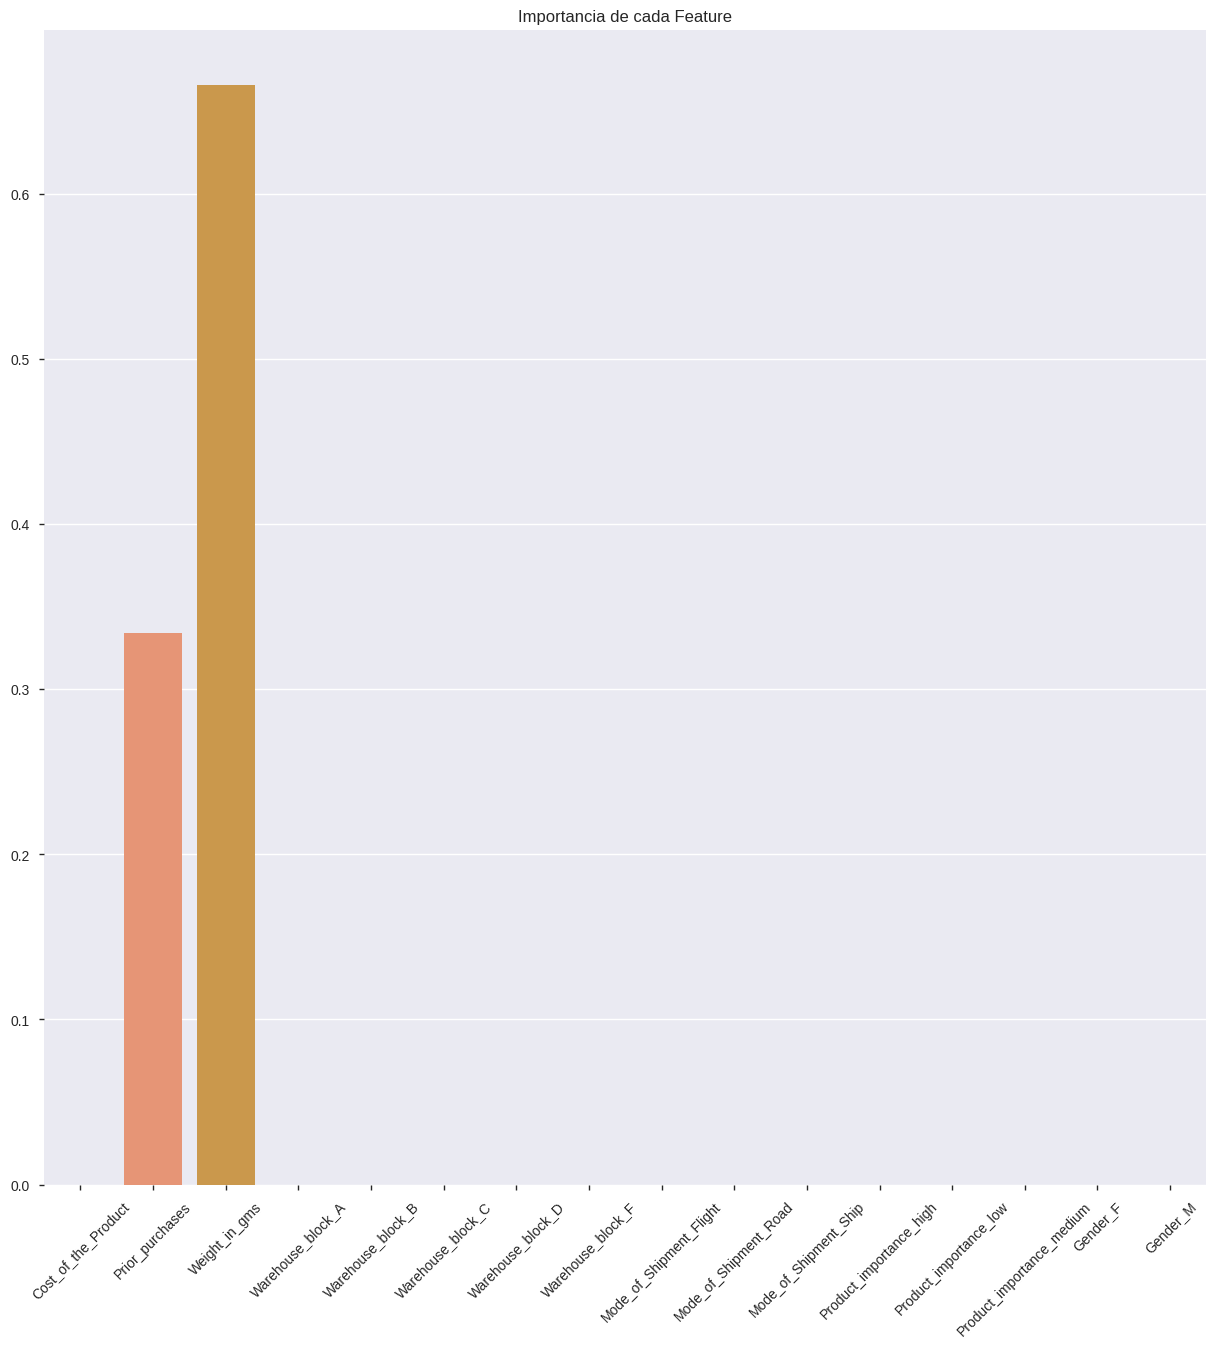

In [ ]:
plt.figure(figsize=(15,15))
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=45)
plt.show()

Profundidad del árbol: 2
Número de nodos terminales: 4


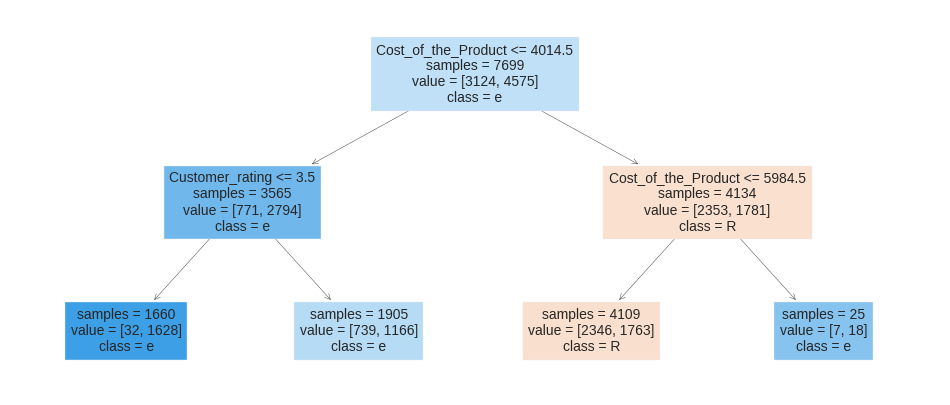

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {tree.get_depth()}")
print(f"Número de nodos terminales: {tree.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree,
            feature_names = df_dummy.drop(columns = 'Reached_on_Time_Y_N').columns,
            class_names   = 'Reached_on_Time_Y_N',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

##KNN

In [ ]:
df = df.rename(columns={'Reached.on.Time_Y.N':'Reached_on_Time_Y_N'})

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
punto_nuevo = {'Weight_in_gms': [3000],
               'Cost_of_the_Product': [220]}

In [ ]:
punto_nuevo = pd.DataFrame(punto_nuevo)

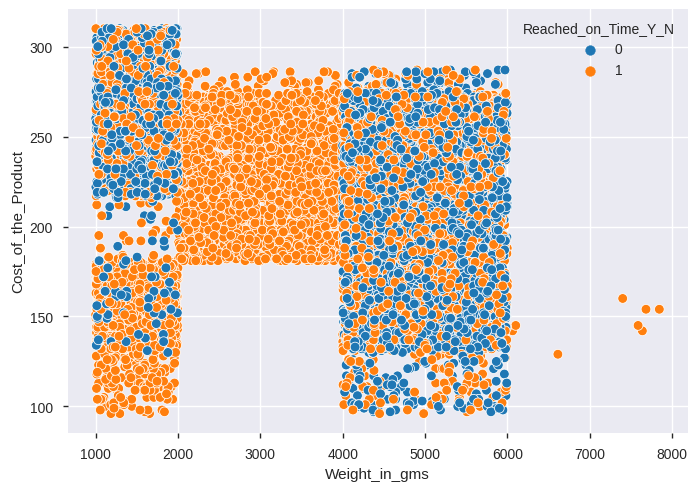

In [ ]:
sns.scatterplot(data=df, x="Weight_in_gms", y="Cost_of_the_Product", hue='Reached_on_Time_Y_N')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
X = df[['Weight_in_gms', 'Cost_of_the_Product']]
y = df[['Reached_on_Time_Y_N']]

knn.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
prediccion = knn.predict(punto_nuevo)
print(prediccion)

[1]


Este módelo KNN nos puede ayudar a identificar si un producto con ciertas características (costo y peso) llegará a tiempo o no. 

##RANDOM FOREST

Crearemos un Random Forest para hacer el mismo ejercicio que con el KNN.

In [ ]:
import urllib.request
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import make_scorer

In [ ]:
X = df.drop('Reached_on_Time_Y_N', axis=1) 
y = df.Reached_on_Time_Y_N

In [ ]:
df_dummy2 = pd.get_dummies(df)
df_dummy

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_Time_Y_N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,4,2,177,3,44,1233,1,0,0,0,1,0,1,0,0,0,1,0,1,0
1,4,5,216,2,59,3088,1,0,0,0,0,1,1,0,0,0,1,0,0,1
2,2,2,183,4,48,3374,1,1,0,0,0,0,1,0,0,0,1,0,0,1
3,3,3,176,4,10,1177,1,0,1,0,0,0,1,0,0,0,0,1,0,1
4,2,2,184,3,46,2484,1,0,0,1,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,1,0,0,0,0,0,0,1,0,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,0,0,0,0,0,1,0,0,1,1,0
10996,5,4,242,5,4,1155,0,0,0,1,0,0,0,0,1,0,1,0,1,0
10997,5,2,223,6,2,1210,0,0,0,0,0,1,0,0,1,0,0,1,0,1


In [ ]:
X = df_dummy.drop('Reached_on_Time_Y_N', axis=1)
y = df_dummy.Reached_on_Time_Y_N

In [ ]:
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [ ]:
tree2 = DecisionTreeClassifier(random_state=11)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
y_test_pred = random_forest.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy_DT = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy_DT)

% de aciertos sobre el set de evaluación: 0.9003636363636364


In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
test_accuracy_RF = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy_RF)

% de aciertos sobre el set de evaluación: 0.6541818181818182


In [ ]:
print('% de aciertos sobre el set de evaluación para DT:',test_accuracy_DT)
print('% de aciertos sobre el set de evaluación para RF:',test_accuracy_RF)

% de aciertos sobre el set de evaluación para DT: 0.9003636363636364
% de aciertos sobre el set de evaluación para RF: 0.6541818181818182


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


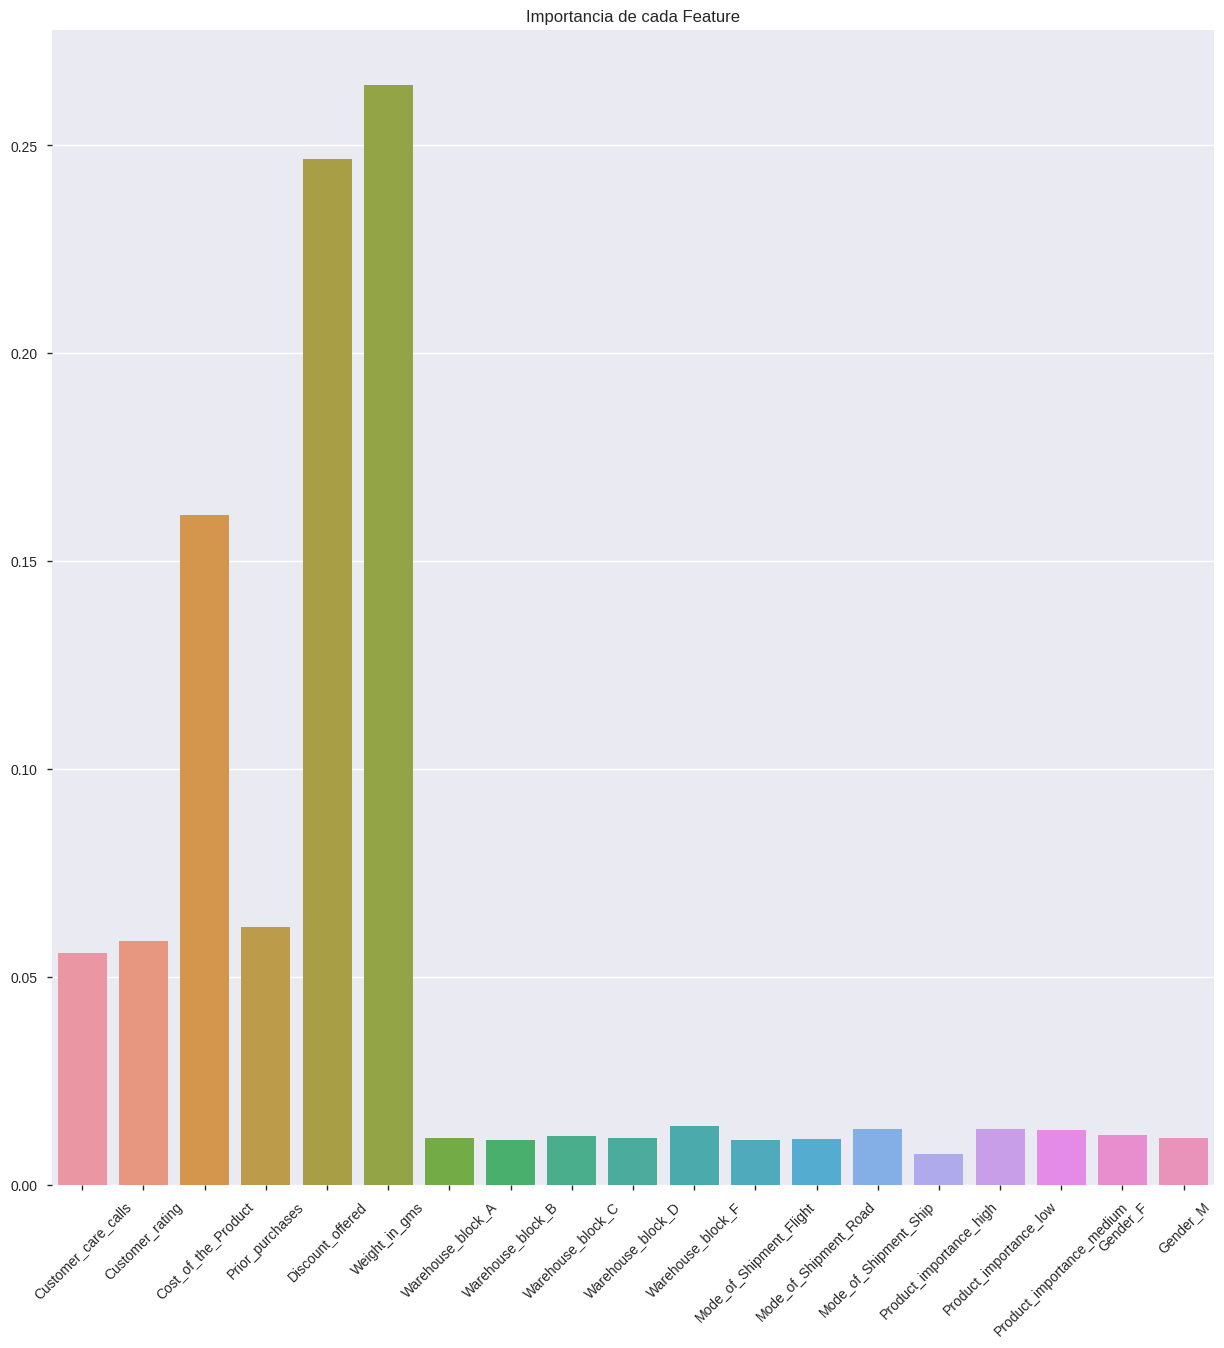

In [ ]:
plt.figure(figsize=(15,15))
importances = model.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=45)
plt.show()